## About the Dataset

Sumber data: https://katalog.data.go.id/dataset/tingkat-kegemaran-membaca.
Data tersebut merupakan data tingkat kegemaran membaca pada tahun 2021 di 34 provinsi. Pada data tersebut juga terdapat informasi durasi akses internet penduduk setiap provinsi.

Dikutip dari informasi yang ada pada laman sumber data,
" Tingkat Kegemaran Membaca Masyarakat adalah tingkat perilaku atau kebiasaan masyarakat dalam memperoleh pengetahuan dan informasi dari berbagai bentuk media yang dapat dilakukan secara mandiri oleh pemerintah daerah dalam jangka waktu tertentu. " 

> Let's preview our dataset first

In [38]:
## Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Load the data
df = pd.read_excel('Eng - Tingkat kegemaran Membaca Tahun 2021.xlsx', header=3)
df.head()

,Unnamed: 0,No,Provinsi/Province,Frekuensi Membaca/Reading Frequency,Jumlah Bahan Bacaan/Number of Reading Material,Durasi Membaca (Jam/Hari)/Reading duration (Hour/Day),Unnamed: 6,Unnamed: 7,Unnamed: 8,Frekuensi Akses Internet/Internet Access Frequency,Durasi Akses Internet (Jam/Hari)/Internet Access Duration (Hour/Day),Unnamed: 11,Unnamed: 12,Unnamed: 13,Tingkat Kegemaran Membaca/ Level of Reading Fondness,Kategori Penilaian/Rating Category
0,NaN,1,DI. Yogyakarta,>= 6 kali/minggu,5 - 6 buku/triwulan,1.0,jam,46.6,menit,>= 6 kali/minggu,1.0,jam,56.1,menit,70.545833,Tinggi
1,NaN,2,Jawa Tengah,5 - 6 kali/minggu,4 - 5 buku/triwulan,2.0,jam,4.2,menit,5 - 6 kali/minggu,2.0,jam,6.9,menit,68.295833,Tinggi
2,NaN,3,Jawa Barat,5 - 6 kali/minggu,4 - 5 buku/triwulan,1.0,jam,48.7,menit,5 - 6 kali/minggu,1.0,jam,57.2,menit,65.337500,Tinggi
3,NaN,4,Kalimantan Timur,5 - 6 kali/minggu,4 - 5 buku/triwulan,1.0,jam,31.8,menit,5 - 6 kali/minggu,1.0,jam,52.9,menit,64.854167,Tinggi
4,NaN,5,Jawa Timur,5 - 6 kali/minggu,4 - 5 buku/triwulan,1.0,jam,42.0,menit,5 - 6 kali/minggu,1.0,jam,52.6,menit,64.195833,Tinggi


## Komentar
Seperti yang terlihat, terdapat beberapa parameter yang dikelompokkan berdasarkan provinsi. Dapat dilihat bahwa parameter penting pada dataset ini adalah 'Tingkat Kegemaran Membaca/Level of Reading Fondness'. Dilansir dari sumber [ini](https://dispusip.jakarta.go.id/dispusip/wp-content/uploads/2020/02/01-PENGUKURAN-TINGKAT-KEGEMARAN-MEMBACA-DKI-JAKARTA-TAHUN-2019.pdf), jika kita menggunakan definisi yang sama untuk tahun 2021, maka "membaca" meliputi bacaan fisik dan bacaan digital (ebook/artikel di internet). Pada sumber tersebut juga dijelaskan definisi dari parameter lain yang ada.

Pada data terdapat durasi membaca dan durasi akses internet. Pada kesempatan kali ini, saya mengasumsikan durasi akses internet yang terpakai adalah untuk memperoleh informasi dan pengetahuan, sama seperti durasi membaca buku. Selain itu, saya tidak menemukan definisi kuantitatif dari Tingkat Kegemaran Membaca sehingga akan dilakukan analisis korelasi parameter membaca dan akses internet dengan tingkat kegemaran membaca

## Tujuan
1. Menganalisis pola perilaku masyarakat dalam memperoleh informasi dan pengetahuan
2. Menentukan korelasi durasi membaca dan durasi akses internet dengan tingkat kegemaran membaca
3. Menganalisis parameter keseluruhan secara deskriptif

## To Do
Terdapat data yang hilang, dan kolom-kolom yang tidak diperlukan. Dari data hanya akan diambil nilai-nilai untuk 34 provinsi. Kolom durasi untuk satuan jam dan menit terpisah, nilai-nilai pada kolom tersebut akan dikonversi kemudian digabungkan. Di akhir, akan ada penambahan kolom latitude dan longitude agar data dapat secara universal di-plot. Berikut rincian hal yang akan dilakukan:

### - Cleaning and Preprocessing
1. Drop kolom-kolom dengan nilai NULL
2. Mengambil data dari 34 provinsi saja
3. Menyatukan satuan durasi jam dan menit menjadi jam untuk durasi membaca dan durasi akses internet
4. Mengubah data categorical menjadi numerical untuk kolom frekuensi membaca dan akses internet untuk selanjutnya dikalikan dengan kolom durasi (jam/hari) agar didapatkan kolom durasi (minggu/hari)

### - Analysis
1. Descriptive analysis

### - Misc.
1. Add latitude and longitude data

## 1. Cleaning and Preprocessing

In [39]:
## See the whole data
print('Shape: ', df.shape)
df

Shape:  (38, 16)


,Unnamed: 0,No,Provinsi/Province,Frekuensi Membaca/Reading Frequency,Jumlah Bahan Bacaan/Number of Reading Material,Durasi Membaca (Jam/Hari)/Reading duration (Hour/Day),Unnamed: 6,Unnamed: 7,Unnamed: 8,Frekuensi Akses Internet/Internet Access Frequency,Durasi Akses Internet (Jam/Hari)/Internet Access Duration (Hour/Day),Unnamed: 11,Unnamed: 12,Unnamed: 13,Tingkat Kegemaran Membaca/ Level of Reading Fondness,Kategori Penilaian/Rating Category
0,NaN,1,DI. Yogyakarta,>= 6 kali/minggu,5 - 6 buku/triwulan,1.0,jam,46.6,menit,>= 6 kali/minggu,1.0,jam,56.1,menit,70.545833,Tinggi
1,NaN,2,Jawa Tengah,5 - 6 kali/minggu,4 - 5 buku/triwulan,2.0,jam,4.2,menit,5 - 6 kali/minggu,2.0,jam,6.9,menit,68.295833,Tinggi
2,NaN,3,Jawa Barat,5 - 6 kali/minggu,4 - 5 buku/triwulan,1.0,jam,48.7,menit,5 - 6 kali/minggu,1.0,jam,57.2,menit,65.337500,Tinggi
3,NaN,4,Kalimantan Timur,5 - 6 kali/minggu,4 - 5 buku/triwulan,1.0,jam,31.8,menit,5 - 6 kali/minggu,1.0,jam,52.9,menit,64.854167,Tinggi
4,NaN,5,Jawa Timur,5 - 6 kali/minggu,4 - 5 buku/triwulan,1.0,jam,42.0,menit,5 - 6 kali/minggu,1.0,jam,52.6,menit,64.195833,Tinggi
5,NaN,6,Aceh,5 - 6 kali/minggu,4 - 5 buku/triwulan,1.0,jam,43.0,menit,5 kali/minggu,1.0,jam,23.9,menit,64.125000,Tinggi
6,NaN,7,Sulawesi Selatan,5 kali/minggu,4 - 5 buku/triwulan,1.0,jam,46.7,menit,5 - 6 kali/minggu,1.0,jam,53.5,menit,63.095833,Tinggi
7,NaN,8,Nusa Tenggara Timur,5 kali/minggu,4 - 5 buku/triwulan,1.0,jam,35.8,menit,5 - 6 kali/minggu,1.0,jam,54.3,menit,63.000000,Tinggi
8,NaN,9,Lampung,5 kali/minggu,4 - 5 buku/triwulan,1.0,jam,26.8,menit,5 - 6 kali/minggu,1.0,jam,41.2,menit,62.441667,Tinggi
9,NaN,10,DKI Jakarta,4 - 5 kali/minggu,4 - 5 buku/triwulan,1.0,jam,41.6,menit,5 - 6 kali/minggu,1.0,jam,47.7,menit,62.245833,Tinggi


In [40]:
## Let's see the data types of each columns
df.dtypes

Unnamed: 0                                                              float64
No                                                                       object
Provinsi/Province                                                        object
Frekuensi Membaca/Reading Frequency                                      object
Jumlah Bahan Bacaan/Number of Reading Material                           object
Durasi Membaca (Jam/Hari)/Reading duration (Hour/Day)                   float64
Unnamed: 6                                                               object
Unnamed: 7                                                              float64
Unnamed: 8                                                               object
Frekuensi Akses Internet/Internet Access Frequency                       object
Durasi Akses Internet (Jam/Hari)/Internet Access Duration (Hour/Day)    float64
Unnamed: 11                                                              object
Unnamed: 12                             

> There are only string and float

In [41]:
## Drop the unnecessary column and column with missing values
df = df.drop(['Unnamed: 0','Unnamed: 6','Unnamed: 8','Unnamed: 11','Unnamed: 13'], axis=1)

## Drop the 34th - 37th rows
df = df[df['Provinsi/Province'].isnull() == False]
df = df.drop(labels=34, axis=0)

## Handling the Duration columns, divide the minute by 60 then add it to hour. Write the result to a new column
df.rename(columns={'Unnamed: 7':'Ekses Durasi Membaca (menit)'
                   , 'Unnamed: 12':'Ekses Durasi Akses Internet (menit)'}, inplace=True)
df['Durasi Membaca (Jam/Hari)'] = df['Durasi Membaca (Jam/Hari)/Reading duration (Hour/Day)'] + df['Ekses Durasi Membaca (menit)']/60
df['Durasi Akses Internet (Jam/Hari)'] = df['Durasi Akses Internet (Jam/Hari)/Internet Access Duration (Hour/Day)'] + df['Ekses Durasi Akses Internet (menit)']/60

## Drop the old Duration columns
df = df.drop(['Durasi Membaca (Jam/Hari)/Reading duration (Hour/Day)'
              ,'Ekses Durasi Membaca (menit)'
              ,'Durasi Akses Internet (Jam/Hari)/Internet Access Duration (Hour/Day)'
              ,'Ekses Durasi Akses Internet (menit)'], axis=1)

## Round the number in new column up to two decimal places
df['Durasi Membaca (Jam/Hari)'] = df['Durasi Membaca (Jam/Hari)'].map(lambda p: round(p,2))
df['Durasi Akses Internet (Jam/Hari)'] = df['Durasi Akses Internet (Jam/Hari)'].map(lambda p: round(p,2))

In [42]:
## change mathematical symbol into words
df.loc[df['Frekuensi Membaca/Reading Frequency'] == '>= 6 kali/minggu', 
           'Frekuensi Membaca/Reading Frequency'] = 'Lebih dari 6 kali/minggu'
df.loc[df['Frekuensi Akses Internet/Internet Access Frequency'] == '>= 6 kali/minggu',
      'Frekuensi Akses Internet/Internet Access Frequency'] = 'Lebih dari 6 kali/minggu'

In [43]:
## Let's see the data again
print('Shape: ', df.shape)
df

Shape:  (34, 9)


,No,Provinsi/Province,Frekuensi Membaca/Reading Frequency,Jumlah Bahan Bacaan/Number of Reading Material,Frekuensi Akses Internet/Internet Access Frequency,Tingkat Kegemaran Membaca/ Level of Reading Fondness,Kategori Penilaian/Rating Category,Durasi Membaca (Jam/Hari),Durasi Akses Internet (Jam/Hari)
0,1,DI. Yogyakarta,Lebih dari 6 kali/minggu,5 - 6 buku/triwulan,Lebih dari 6 kali/minggu,70.545833,Tinggi,1.78,1.94
1,2,Jawa Tengah,5 - 6 kali/minggu,4 - 5 buku/triwulan,5 - 6 kali/minggu,68.295833,Tinggi,2.07,2.12
2,3,Jawa Barat,5 - 6 kali/minggu,4 - 5 buku/triwulan,5 - 6 kali/minggu,65.337500,Tinggi,1.81,1.95
3,4,Kalimantan Timur,5 - 6 kali/minggu,4 - 5 buku/triwulan,5 - 6 kali/minggu,64.854167,Tinggi,1.53,1.88
4,5,Jawa Timur,5 - 6 kali/minggu,4 - 5 buku/triwulan,5 - 6 kali/minggu,64.195833,Tinggi,1.70,1.88
5,6,Aceh,5 - 6 kali/minggu,4 - 5 buku/triwulan,5 kali/minggu,64.125000,Tinggi,1.72,1.40
6,7,Sulawesi Selatan,5 kali/minggu,4 - 5 buku/triwulan,5 - 6 kali/minggu,63.095833,Tinggi,1.78,1.89
7,8,Nusa Tenggara Timur,5 kali/minggu,4 - 5 buku/triwulan,5 - 6 kali/minggu,63.000000,Tinggi,1.60,1.90
8,9,Lampung,5 kali/minggu,4 - 5 buku/triwulan,5 - 6 kali/minggu,62.441667,Tinggi,1.45,1.69
9,10,DKI Jakarta,4 - 5 kali/minggu,4 - 5 buku/triwulan,5 - 6 kali/minggu,62.245833,Tinggi,1.69,1.79


In [44]:
## I would like to change categorical variable in Frekuensi columns into numerical variable
## The first is Frekuensi Membaca/Reading Frequency
## I am going to change the value. > 6 kali/minggu to 6, 5-6 to 5.5, 5 to 5, 4 - 5 to 4.5 so on and so forth
## We might need to check the values first
df['Frekuensi Membaca/Reading Frequency'].to_list()

new_col_1 = []
for el in df['Frekuensi Membaca/Reading Frequency']:
    if el == 'Lebih dari 6 kali/minggu':
        new_col_1.append(6)
    elif el == '5 - 6 kali/minggu':
        new_col_1.append(5.5)
    elif el == '5 kali/minggu':
        new_col_1.append(5)
    elif el == '4 - 5 kali/minggu':
        new_col_1.append(4.5)
    elif el == '3 - 4 kali/minggu':
        new_col_1.append(3.5)
    elif el == '4  kali/minggu':
        new_col_1.append(4)
    else:
        new_col_1.append('NA')
        
print(new_col_1)

[6, 5.5, 5.5, 5.5, 5.5, 5.5, 5, 5, 5, 4.5, 4.5, 4.5, 4.5, 5, 5, 5, 4.5, 4.5, 5.5, 5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 3.5, 4, 3.5, 4]


In [45]:
## The second column is Frekuensi Akses Internet/Internet Access Frequency
## We might need to check the values first
df['Frekuensi Akses Internet/Internet Access Frequency'].to_list()

new_col_2 = []
for el in df['Frekuensi Akses Internet/Internet Access Frequency']:
    if el == 'Lebih dari 6 kali/minggu':
        new_col_2.append(6)
    elif el == '5 - 6 kali/minggu':
        new_col_2.append(5.5)
    elif el == '5 kali/minggu':
        new_col_2.append(5)
    elif el == '4 - 5 kali/minggu':
        new_col_2.append(4.5)
    elif el == '3 - 4 kali/minggu':
        new_col_2.append(3.5)
    elif el == '4  kali/minggu':
        new_col_2.append(4)
    else:
        new_col_2.append('NA')
        
print(new_col_2)

[6, 5.5, 5.5, 5.5, 5.5, 5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5, 4.5, 5.5, 5.5, 5.5, 5, 4.5, 5.5, 5, 5.5, 4.5, 4.5, 4.5, 4.5, 4.5, 3.5, 4.5, 4.5]


## Komentar

Selanjutnya bisa didapatkan parameter yang lebih cocok untuk menggambarkan durasi membaca dan durasi akses internet dibandingkan durasi per hari. Parameter tersebut bisa didapatkan dengan mengalikan frekuensi membaca atau akses internet dengan durasi per hari dengan asumsi membaca 1 kali membutuhkan waktu sejumlah durasi membaca/hari

In [46]:
## Untuk durasi membaca per minggu
df['Numerical Frekuensi Membaca'] = pd.Series(new_col_1)
df['Durasi Membaca per Minggu (Jam)'] = df['Numerical Frekuensi Membaca']*df['Durasi Membaca (Jam/Hari)']

## Untuk durasi akses internet per minggu
df['Numerical Frekuensi Akses Internet'] = pd.Series(new_col_2)
df['Durasi Akses Internet per Minggu (Jam)'] = df['Numerical Frekuensi Akses Internet']*df['Durasi Akses Internet (Jam/Hari)']

## 2. Analysis
The visualization in this notebook is for EDA purpose only. A better-looking visualization can be seen in .pbix file (you will need Power BI to open the file)

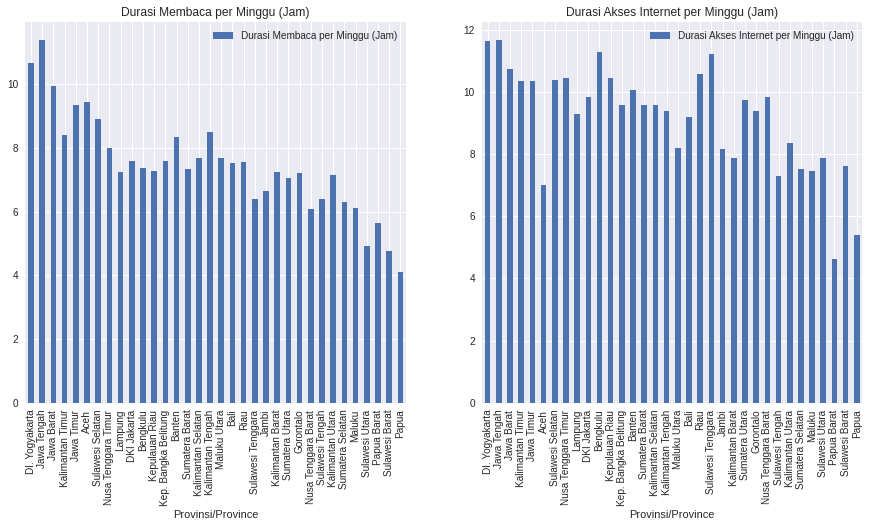

In [47]:
fig, ax = plt.subplots(ncols=2, figsize=(15,7))

df.plot(x='Provinsi/Province', y='Durasi Membaca per Minggu (Jam)', kind='bar', ax=ax[0], subplots=True)
df.plot(x='Provinsi/Province', y='Durasi Akses Internet per Minggu (Jam)', kind='bar', ax=ax[1], subplots=True)

plt.show()

<AxesSubplot:xlabel='Provinsi/Province'>

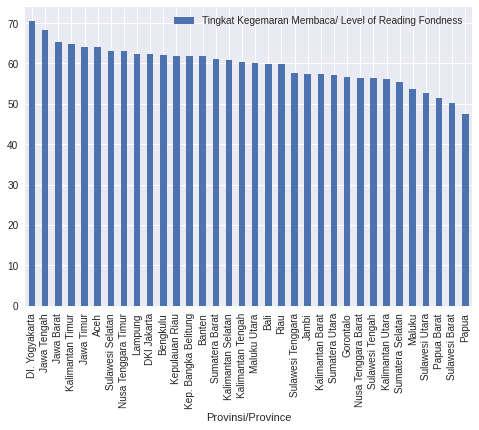

In [67]:
## plot tingkat kegemaran membaca
df.plot(x='Provinsi/Province', y='Tingkat Kegemaran Membaca/ Level of Reading Fondness', kind='bar')

(0.0, 18.0)

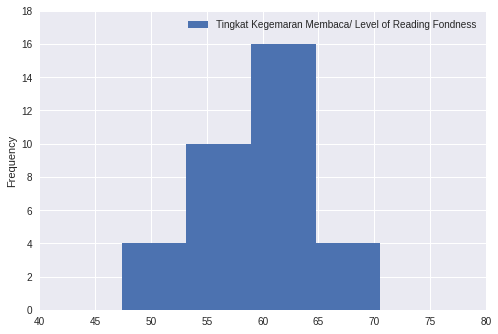

In [105]:
## Histogram tingkat kegemaran membaca
ax = df.plot.hist(column=['Tingkat Kegemaran Membaca/ Level of Reading Fondness'], bins=12)
ax.set_xlim(40,80)
ax.set_ylim(0,18)

DescribeResult(nobs=34, minmax=(47.425, 70.54583333333333), mean=59.519240196078435, variance=25.116841345439695, skewness=-0.2770409357837349, kurtosis=0.06459451883292955)

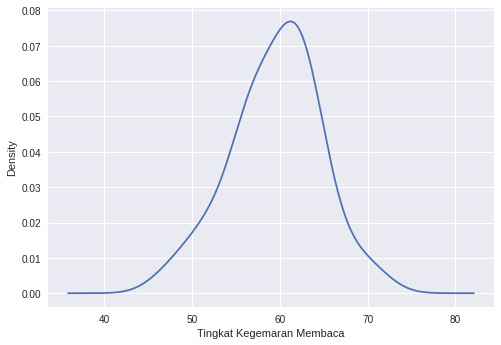

In [120]:
## KDE tingkat kegemaran membaca
from scipy.stats import describe
ax = df['Tingkat Kegemaran Membaca/ Level of Reading Fondness'].plot.kde()
ax.set_xlabel('Tingkat Kegemaran Membaca')
describe(df['Tingkat Kegemaran Membaca/ Level of Reading Fondness'], axis=0)

In [49]:
## Here is the summary of the numerical variable
df.describe()

,Tingkat Kegemaran Membaca/ Level of Reading Fondness,Durasi Membaca (Jam/Hari),Durasi Akses Internet (Jam/Hari),Numerical Frekuensi Membaca,Durasi Membaca per Minggu (Jam),Numerical Frekuensi Akses Internet,Durasi Akses Internet per Minggu (Jam)
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,59.519240,1.566176,1.775294,4.735294,7.471029,5.132353,9.173382
std,5.011671,0.193735,0.192515,0.567227,1.571278,0.540886,1.675713
min,47.425000,1.030000,1.200000,3.500000,4.120000,3.500000,4.620000
25%,56.451042,1.420000,1.690000,4.500000,6.457500,4.500000,7.943750
50%,60.191667,1.580000,1.790000,4.500000,7.365000,5.500000,9.570000
75%,62.392708,1.690000,1.887500,5.000000,8.262500,5.500000,10.381250
max,70.545833,2.070000,2.120000,6.000000,11.385000,6.000000,11.660000


## Komentar
* Jawa Tengah memiliki durasi membaca dan durasi akses internet terbesar dibandingkan dengan provinsi lainnya. Sementara itu, durasi membaca paling rendah dimiliki oleh provinsi Papua dan durasi akses internet paling rendah dimiliki oleh provinsi papua barat
* Rerata median dari Tingkat Kegemaran Membaca dari seluruh provinsi di indonesia berada pada nilai 60,19
* Yogyakarta memiliki tingkat kegemaran membaca paling tinggi, sedangkan tingkat kegemaran membaca paling rendah dipegang oleh provinsi Papua
* Meskipun durasi membaca dan akses internet paling besar dipegang oleh Jawa Tengah, namun tingkat kegemaran membaca paling besar dipegang oleh Yogya. Hal ini menunjukkan bahwa parameter jumlah bacaan juga diperhitungkan dan memiliki peran yang signifikan terhadap nilai tingkat kegemaran membaca
* Distribusi tingkat kegemaran membaca cenderung besar di kanan median dengan nilai skewness -0.27, hal ini menunjukkan adanya kesenjangan dari distribusi normal

<AxesSubplot:xlabel='Provinsi/Province'>

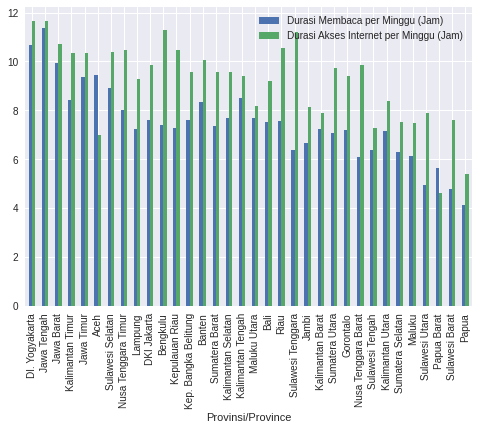

In [50]:
## I want to see whether people in a certain province have greater reading duration than internet access duration or not
## For that, i think the most intuitive way to demonstrate it is by bar plot
df.plot(x='Provinsi/Province', y=['Durasi Membaca per Minggu (Jam)','Durasi Akses Internet per Minggu (Jam)'], kind='bar')

> Tidak terlalu jelas, kita ganti ke line plot

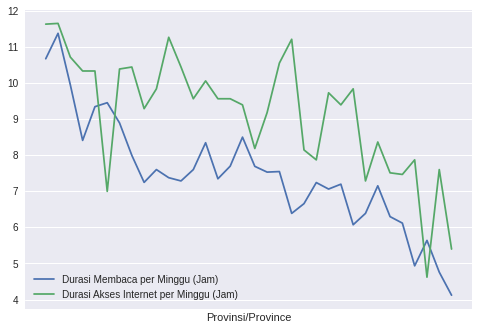

In [51]:
df.plot(x='Provinsi/Province', y=['Durasi Membaca per Minggu (Jam)','Durasi Akses Internet per Minggu (Jam)'])
plt.xticks([], rotation=90)
plt.show()

> Hampir semua provinsi memiliki kecenderungan untuk lebih lama mengakses internet dibandingkan dengan membaca buku, hanya terdapat 2 titik yang memiliki durasi membaca per minggu yang lebih besar dari durasi akses internet per minggu.

In [53]:
df[df['Durasi Membaca per Minggu (Jam)'] > 
     df['Durasi Akses Internet per Minggu (Jam)']]['Provinsi/Province'].to_list()

['Aceh', 'Papua Barat']

> Akan ditentukan rerata perbedaan durasi preferensi mendapatkan informasi dan pengetahuan, yakni durasi membaca buku - durasi akses internet

In [121]:
avg_diff_pref = sum(df['Durasi Membaca per Minggu (Jam)'] - df['Durasi Akses Internet per Minggu (Jam)'])/len(df)
print("rerata perbedaan durasi:", avg_diff_pref)

from scipy.stats import tstd
std_diff_pref = tstd(df['Durasi Membaca per Minggu (Jam)'] - df['Durasi Akses Internet per Minggu (Jam)'])
print("standard deviasi:", std_diff_pref)

rerata perbedaan durasi: -1.7023529411764704
standard deviasi: 1.3659774141252035


## Komentar
* Aceh dan Papua Barat memiliki durasi membaca yang lebih besar daripada durasi akses internetnya

In [119]:
#Koefisien korelasi untuk durasi membaca dengan tingkat kegemaran membaca
from scipy.stats import pearsonr
r_baca, p_baca = pearsonr(df['Durasi Membaca per Minggu (Jam)']
                          , df['Tingkat Kegemaran Membaca/ Level of Reading Fondness'])
print('Koefisien korelasi antara durasi membaca dengan tingkat kegemaran membaca:', r_baca)
print('p-value:', p_baca)

#Koefisien korelasi untuk durasi akses internet dengan tingkat kegemaran membaca
r_internet, p_internet = pearsonr(df['Durasi Membaca per Minggu (Jam)']
                          , df['Durasi Akses Internet per Minggu (Jam)'])
print('Koefisien korelasi antara durasi akses internet dengan tingkat kegemaran membaca:', r_internet)
print('p-value:', p_internet)

Koefisien korelasi antara durasi membaca dengan tingkat kegemaran membaca: 0.9327908852876292
p-value: 9.819950125184569e-16
Koefisien korelasi antara durasi akses internet dengan tingkat kegemaran membaca: 0.6477439902013999
p-value: 3.453867635051491e-05


## Komentar
* Korelasi parameter tingkat kegemaran membaca berkorelasi sangat kuat dengan durasi membaca dan berkorelasi moderate dengan durasi akses internet. Terdapat kemungkinan kuat parameter tingkat kegemaran membaca memberikan persentase yang lebih besar pada durasi membaca buku dibandingkan dengan durasi akses internet

## 3. Misc

I want to add longitude and latitude data. I found the data in a github [link](https://raw.githubusercontent.com/benangmerah/wilayah/master/datasources/daftar-nama-daerah.csv), but it only contains 33 province and Kalimantan Utara Province is missing. So, i search for the lat and long of kalimantan utara manually from its gov [website](https://kaltaraprov.go.id/profil/geografis#:~:text=Provinsi%20Kalimantan%20Utara%20yang%20memiliki,24'%2055'%20Lintang%20Utara.). In order to sort the latitude and longitude data to match the first dataframe, I need to add another column, *Urutan*.

In [60]:
# Let's name the second dataframe df_2
df_2 = pd.read_csv('https://raw.githubusercontent.com/benangmerah/wilayah/master/datasources/daftar-nama-daerah.csv')
df_2

,nid,parent_nid,name,serial,type,latitude,longitude,status
0,1,0,Provinsi Aceh,11,1,4.695135,96.749399,1
1,2,0,Provinsi Sumatera Utara,12,1,2.115355,99.545097,1
2,3,0,Provinsi Sumatera Barat,13,1,-0.739940,100.800005,1
3,4,0,Provinsi Riau,14,1,0.293347,101.706829,1
4,5,0,Provinsi Jambi,15,1,-1.485183,102.438058,1
...,...,...,...,...,...,...,...,...
538,1794,33,Kabupaten Nduga,9124,2,-4.406950,138.239353,1
539,1795,33,Kabupaten Puncak,9125,2,-6.712548,106.954243,1
540,1796,33,Kabupaten Dogiyai,9126,2,-4.019387,135.961045,1
541,1797,33,Kabupaten Intan Jaya,9127,2,-3.507642,136.747849,1


In [61]:
## I am just interested two three columns, then name the new dataframe to be table_to_join
table_to_join = df_2.loc[0:32,['name','latitude','longitude']]

## Get rid of the 'Provinsi' string so that the column 'name' match better with the first dataframe
table_to_join.name = table_to_join.name.map(lambda p: p[9:])

## Let's rename some values to match the first dataframe
table_to_join.loc[13,'name'] = "DI. Yogyakarta"
table_to_join.loc[8,'name'] = 'Kep. Bangka Belitung'

In [62]:
## I got the lat and long values from 
## https://kaltaraprov.go.id/profil/geografis#:~:text=Provinsi%20Kalimantan%20Utara%20yang%20memiliki,24'%2055'%20Lintang%20Utara.
## I take the average over the values' range
def unit_transform(h,m,s):
    return h+(m/60)+(s/3600)

kaltara_longitude = round((unit_transform(114,35,22)+unit_transform(118,3,0))/2,6)
kaltara_latitude =  round((unit_transform(1,21,36)+unit_transform(4,24,55))/2,6)

## Add it to the table_to_join so that we have 34 province
table_to_join.loc[len(df.index)] = ['Kalimantan Utara', kaltara_latitude, kaltara_longitude]

In [ ]:
## It's better to use pd.concat to join data if you have another dataframe instead of a list
"""
kaltara = pd.DataFrame({'name': ['Kalimantan Utara','a'], 'latitude': [kaltara_latitude,60],
                     'longitude': [kaltara_longitude,10]})

df_3 = pd.concat([table_to_join,kaltara], ignore_index=True)
df_3.reset_index()
"""

In [63]:
## This part is to retrieve the order of each province based on the first database
## try and except are used to detect if there is a mismatch in table_to_join and first dataframe
list_to_append = []
for el in table_to_join.name.tolist():
    try:
        list_to_append.append(df['Provinsi/Province'].tolist().index(el))
    except:
        list_to_append.append('NA')
        print(el,' is missing')
for el in df['Provinsi/Province'].tolist():
    try:
        table_to_join.name.tolist().index(el)
    except:
        print(el,' does not have lat and long')

In [64]:
## Add 'Urutan' column to the table_to_join then sort it 
table_to_join['Urutan'] = list_to_append

## This part will make order the same as the first dataframe
table_to_join = table_to_join.sort_values(by='Urutan', ignore_index=True)

## Set urutan as Index
table_to_join.set_index('Urutan', inplace=True)
table_to_join

,name,latitude,longitude
Urutan,,,
0,DI. Yogyakarta,-7.875385,110.426209
1,Jawa Tengah,-7.150975,110.140259
2,Jawa Barat,-7.090911,107.668887
3,Kalimantan Timur,1.640630,116.419389
4,Jawa Timur,-7.536064,112.238402
5,Aceh,4.695135,96.749399
6,Sulawesi Selatan,-3.668799,119.974053
7,Nusa Tenggara Timur,-8.657382,121.079370
8,Lampung,-4.558585,105.406808


In [65]:
## Finally, we can join the first dataframe and the dataframe which contain lat and long data
## Note that we have the same value for 'Provinsi/Province' and 'name' columns
df_3 = pd.concat([df,table_to_join], axis=1)
df_3

,No,Provinsi/Province,Frekuensi Membaca/Reading Frequency,Jumlah Bahan Bacaan/Number of Reading Material,Frekuensi Akses Internet/Internet Access Frequency,Tingkat Kegemaran Membaca/ Level of Reading Fondness,Kategori Penilaian/Rating Category,Durasi Membaca (Jam/Hari),Durasi Akses Internet (Jam/Hari),Numerical Frekuensi Membaca,Durasi Membaca per Minggu (Jam),Numerical Frekuensi Akses Internet,Durasi Akses Internet per Minggu (Jam),name,latitude,longitude
0,1,DI. Yogyakarta,Lebih dari 6 kali/minggu,5 - 6 buku/triwulan,Lebih dari 6 kali/minggu,70.545833,Tinggi,1.78,1.94,6.0,10.680,6.0,11.640,DI. Yogyakarta,-7.875385,110.426209
1,2,Jawa Tengah,5 - 6 kali/minggu,4 - 5 buku/triwulan,5 - 6 kali/minggu,68.295833,Tinggi,2.07,2.12,5.5,11.385,5.5,11.660,Jawa Tengah,-7.150975,110.140259
2,3,Jawa Barat,5 - 6 kali/minggu,4 - 5 buku/triwulan,5 - 6 kali/minggu,65.337500,Tinggi,1.81,1.95,5.5,9.955,5.5,10.725,Jawa Barat,-7.090911,107.668887
3,4,Kalimantan Timur,5 - 6 kali/minggu,4 - 5 buku/triwulan,5 - 6 kali/minggu,64.854167,Tinggi,1.53,1.88,5.5,8.415,5.5,10.340,Kalimantan Timur,1.640630,116.419389
4,5,Jawa Timur,5 - 6 kali/minggu,4 - 5 buku/triwulan,5 - 6 kali/minggu,64.195833,Tinggi,1.70,1.88,5.5,9.350,5.5,10.340,Jawa Timur,-7.536064,112.238402
5,6,Aceh,5 - 6 kali/minggu,4 - 5 buku/triwulan,5 kali/minggu,64.125000,Tinggi,1.72,1.40,5.5,9.460,5.0,7.000,Aceh,4.695135,96.749399
6,7,Sulawesi Selatan,5 kali/minggu,4 - 5 buku/triwulan,5 - 6 kali/minggu,63.095833,Tinggi,1.78,1.89,5.0,8.900,5.5,10.395,Sulawesi Selatan,-3.668799,119.974053
7,8,Nusa Tenggara Timur,5 kali/minggu,4 - 5 buku/triwulan,5 - 6 kali/minggu,63.000000,Tinggi,1.60,1.90,5.0,8.000,5.5,10.450,Nusa Tenggara Timur,-8.657382,121.079370
8,9,Lampung,5 kali/minggu,4 - 5 buku/triwulan,5 - 6 kali/minggu,62.441667,Tinggi,1.45,1.69,5.0,7.250,5.5,9.295,Lampung,-4.558585,105.406808
9,10,DKI Jakarta,4 - 5 kali/minggu,4 - 5 buku/triwulan,5 - 6 kali/minggu,62.245833,Tinggi,1.69,1.79,4.5,7.605,5.5,9.845,DKI Jakarta,-6.211544,106.845172


In [66]:
## We don't need this column anymore
df_3 = df_3.drop(['name'], axis=1)

## Convert it to csv file
df_3.to_csv('kegemaran-membaca-finish.csv')

## Kesimpulan terkait data
1. Masyarakat di Indonesia cenderung mencari informasi dan pengetahuan lewat internet, dengan perbedaan rata-rata durasi akses internet dan durasi membaca buku adalah 1,70 jam dengan standar deviasi 1,36 jam 
2. Korelasi parameter tingkat kegemaran membaca berkorelasi sangat kuat dengan durasi membaca r = 0,93 dan berkorelasi moderate dengan durasi akses internet r = 0,65. Terdapat kemungkinan kuat parameter tingkat kegemaran membaca memberikan persentase yang lebih besar pada durasi membaca buku dibandingkan dengan durasi akses internet
3. 
* Jawa Tengah memiliki durasi membaca dan durasi akses internet terbesar dibandingkan dengan provinsi lainnya. Sementara itu, durasi membaca paling rendah dimiliki oleh provinsi Papua dan durasi akses internet paling rendah dimiliki oleh provinsi papua barat
* Rerata median dari Tingkat Kegemaran Membaca dari seluruh provinsi di indonesia berada pada nilai 60,19
* Yogyakarta memiliki tingkat kegemaran membaca paling tinggi, sedangkan tingkat kegemaran membaca paling rendah dipegang oleh provinsi Papua
* Meskipun durasi membaca dan akses internet paling besar dipegang oleh Jawa Tengah, namun tingkat kegemaran membaca paling besar dipegang oleh Yogya. Hal ini menunjukkan bahwa parameter jumlah bacaan juga diperhitungkan dan memiliki peran yang signifikan terhadap nilai tingkat kegemaran membaca
* Distribusi tingkat kegemaran membaca cenderung besar di kanan median dengan nilai skewness -0.27, hal ini menunjukkan adanya kesenjangan dari distribusi normal